In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

from correlation_analysis import corr_matrix
from correlation_analysis import set_layout

MAKE CORRELATION HEAT MAPS FOR TWO/MULTI STATE FOLDERS, SUBDIVIDED BY THEIR CO

Load correlation data, calculated in 'CT_FoldingRate_corr'

In [29]:
file_name='Out_segments_60_4'
higher = pd.read_excel('results/{}/higherCO.xls'.format(file_name))
ave=pd.read_excel('results/{}/aveCO.xls'.format(file_name))
lower= pd.read_excel('results/{}/lowerCO.xls'.format(file_name))

#print data
display(higher)
display(ave)
display(lower)

,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,0.18,0.570,0.17,0.601,-0.43,0.162,two
1,-0.55,0.026,0.51,0.045,0.14,0.613,multi


,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,0.20,0.220,-0.07,0.648,-0.17,0.300,two
1,-0.28,0.262,0.51,0.029,-0.52,0.028,multi


,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,0.14,0.495,-0.02,0.923,-0.27,0.199,two
1,-0.75,0.051,0.82,0.025,-0.96,0.001,multi


Make correlation matrix: all values that yield pvalue<0.05 are eliminated

In [26]:
corr_corrected=corr_matrix(higher, ave, lower)

Plot heatmap

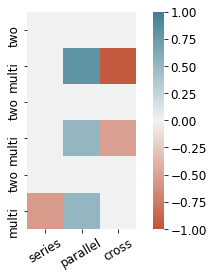

In [27]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 17
set_layout(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

ax = sns.heatmap(
    corr_corrected, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
xlabels=['series','parallel','cross']
ylabels=['two','multi','two','multi','two','multi']
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
plt.xticks(rotation=30)
plt.savefig('results/{}/figures/CO_correlation.jpg'.format(file_name))
plt.savefig('results/{}/figures/CO_correlation.eps'.format(file_name),bbox_inches='tight')